# Clustering

### K Means

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy import square, sqrt
%matplotlib inline

In [4]:
import sys

data = np.genfromtxt("data.csv", delimiter=",")
print(data[0])

def generateClusters(data, mu):
    clusters = [[] for _ in range(len(mu))]
    for d in data:
        sDist = sys.maxsize
        cluster = 0
        for i in range(len(mu)):
            dist = (d[0] - mu[i][0])**2 + (d[1] - mu[i][1])**2
            if dist < sDist:
                sDist = dist
                cluster = i
        clusters[cluster].append(d)
    return clusters
#dt = [[4,13],[15,13],[20,16],[6,7]]
#m = [[10,10],[20,15]]
#clusters = generateClusters(dt, m)

[-0.73169779 -0.87431051]


In [5]:
def recompute_centroids(clusters):
    centroids = []
    for cluster in clusters:
        x = 0
        y = 0
        for d in cluster:
            x += d[0]
            y += d[1]
        centroid = [float(x/len(cluster)), float(y/len(cluster))]
        centroids.append(centroid)
    return centroids

In [6]:
def checkConvergence(mu, previous_mu):
    #return sorted(mu) == sorted(list(previous_mu))
    if np.array_equal(mu, previous_mu):
        return True
    return False

In [7]:
def kMeansClustering(data, k):
    clusters = None
    mu = [random.choice(data) for d in range(k)]
    previous_mu = list(mu)
    #previous_mu = [list(data[d]) for d in range(0,8*k, 8)]
    #Generate Clusters
    clusters = generateClusters(data, mu)
    #Generate New Centroids
    mu = recompute_centroids(clusters)
    #Check Convergence
    while not checkConvergence(mu, previous_mu):
        previous_mu = mu
        clusters = generateClusters(data, mu)
        mu = recompute_centroids(clusters)
    return(mu, clusters)

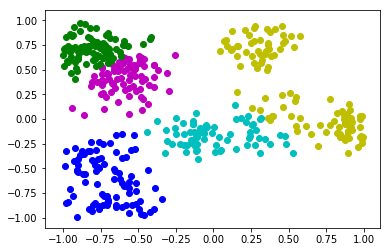

Total Cohesian: 44.7562583729
Total Separation: 227.956245999


In [8]:
mu, clusters = kMeansClustering(data, 5)
color=['b','m','y','c', 'g', 'black']
c = 0
for cluster in clusters:
    npCluster = np.array(cluster)
    plt.scatter(npCluster[:,0], npCluster[:,1], color=color[c])
    c += 1
plt.show()

# Calculates Cohesian for clusters
def calcCohesian(mu, clusters):
    total_cohesian = 0
    for m in range(len(mu)):
        for p in clusters[m]:
            total_cohesian += (p[0] - mu[m][0])**2 + (p[1] - mu[m][1])**2
    return total_cohesian

def calcOverallCentroid(data):
    x = 0
    y = 0
    for d in data:
        x += d[0]
        y += d[1]
    return (x/len(data), y/len(data))

def calcSeparation(mu, clusters, overallCentroid):
    totalSeparation = 0
    for m in range(len(mu)):
        totalSeparation += len(clusters[m]) * ((overallCentroid[0] - mu[m][0])**2 + (overallCentroid[1] - mu[m][1])**2)
    return totalSeparation
print("Total Cohesian: " + str(calcCohesian(mu, clusters)))
print("Total Separation: " + str(calcSeparation(mu, clusters, calcOverallCentroid(data))))

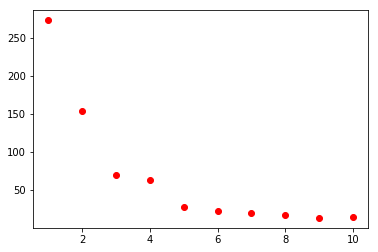

In [9]:
def calculateSSE(mu, clusters):
    totalSSE = 0
    for i in range(len(mu)):
        centr = mu[i]
        for d in clusters[i]:
            totalSSE += (centr[0]-d[0])**2 + (centr[1] - d[1])**2
    return totalSSE

x = []
y = []
for k in range(1, 11):
    x.append(k)
    mu, clusters = kMeansClustering(data, k)
    y.append(calculateSSE(mu, clusters))
plt.plot(x, y, 'ro')

### Hierarchical Clustering

In [11]:
data = np.genfromtxt("data2.csv", delimiter=",")
print (data)
l = [[0]*2 for i in range(2)]
print(l)

[[-0.23604872 -0.83012675]
 [-0.20753952 -0.66550322]
 [-0.48108096 -0.46727384]
 [-0.27729046 -0.59349899]
 [-0.04479072 -0.5984576 ]
 [-0.13136382 -0.67378397]
 [-0.11719707 -0.76280307]
 [-0.57597308  0.02505388]
 [-0.00095456 -0.13908238]
 [-0.13936793 -0.18521367]
 [-0.01954153  0.11605246]
 [-0.05791985 -0.21984893]
 [-0.29589549 -0.12918766]
 [-0.1101182  -0.03476591]
 [ 0.20765516  0.81449598]
 [ 0.2755254   0.62343378]
 [ 0.55693317  0.59108196]
 [ 0.4974992   0.64904387]
 [ 0.19195484  0.64492109]
 [ 0.75587755  0.408303  ]]
[[0, 0], [0, 0]]


In [12]:
import scipy.spatial.distance
import scipy.stats

# Each point is in a different cluster
#clusterIdx = [i for i in range(len(data))]
# Develop a matrix of dist
dist = scipy.spatial.distance.cdist(data, data)
#print(dist)
#Loop through matrix where i != j and while i > j <- this avoids going below the diagonal

def findNextShortestDistance(distMatrix, prevDist):
    minx = 0
    miny = 0
    minV = sys.maxsize
    for i in range(0, len(data)):
        for j in range(0, i):
            if dist[i][j] < minV and dist[i][j] > prevDist:
                #print(dist[i][j])
                minV = dist[i][j]
                minx = i
                miny = j
    return minx, miny, minV

def getClusterWithX(clusters, x):
    for i in range(len(clusters)):
        if x in clusters[i]:
            return i
    return -1

minD = 0
clusters = []
cophDistMatrix = l = [[0]*len(data) for i in range(len(data))]
remainingPoints = [i for i in range(len(data))]
while len(remainingPoints) != 0 or len(clusters) > 1:
    x, y, minD = findNextShortestDistance(dist, minD)
    if x in remainingPoints:
        remainingPoints.remove(x)
    if y in remainingPoints:
        remainingPoints.remove(y)
    
    if getClusterWithX(clusters, x) != -1 and getClusterWithX(clusters, y) != -1 and getClusterWithX(clusters, x) == getClusterWithX(clusters, y):
        continue
    #print("(" + str(x) + ", "  + str(y) + ")")
    #print(dist[x][y])
    # need to combine cluster x and y
    if getClusterWithX(clusters, x) == -1 and getClusterWithX(clusters, y) == -1:
        clusters.append([x, y])
        cophDistMatrix[x][y] = dist[x][y]
        cophDistMatrix[y][x] = dist[x][y]
    elif getClusterWithX(clusters, x) == -1 and getClusterWithX(clusters, y) != -1:
        # add x to the cluster containing y and update coph matrix
        clusterIdx = getClusterWithX(clusters, y)
        for idx in clusters[clusterIdx]:
            cophDistMatrix[x][idx] = minD
            cophDistMatrix[idx][x] = minD
        clusters[clusterIdx].append(x)
        #need to add to the cophDistMatrix
    elif getClusterWithX(clusters, x) != -1 and getClusterWithX(clusters, y) == -1:
        # add x to the cluster containing y and update coph matrix
        clusterIdx = getClusterWithX(clusters, x)
        for idx in clusters[clusterIdx]:
            cophDistMatrix[y][idx] = minD
            cophDistMatrix[idx][y] = minD
        clusters[clusterIdx].append(y)
    elif getClusterWithX(clusters, x) != -1 and getClusterWithX(clusters, y) != -1:
        clusterIdxY = getClusterWithX(clusters, y)
        clusterIdxX = getClusterWithX(clusters, x)
        # Loop through both lists and update conf matrix
        for a in clusters[clusterIdxX]:
            for b in clusters[clusterIdxY]:
                cophDistMatrix[a][b] = minD
                cophDistMatrix[b][a] = minD
        # combine the two lists and remove one from clusters
        clusters[clusterIdxX].extend(clusters[clusterIdxY])
        clusters.pop(clusterIdxY)
    
totalCPCC = 0
x = []
y = []
for i in range(0, len(data)):
        for j in range(0, i):
            x.append(dist[i][j])
            y.append(cophDistMatrix[i][j])

print("Pearson Correlation: " + str(scipy.stats.pearsonr(x, y)) + "\n")
            
print("CPCC: " + str(y))

Pearson Correlation: (0.88083955521286261, 5.8104844396664423e-63)

CPCC: [0.13659499380340881, 0.23971516134090542, 0.23971516134090542, 0.13659499380340881, 0.10024869501414092, 0.23971516134090542, 0.13659499380340881, 0.11475610658682694, 0.23971516134090542, 0.11475610658682694, 0.13659499380340881, 0.076624467900620802, 0.23971516134090542, 0.10024869501414092, 0.11475610658682694, 0.13659499380340881, 0.090139317220562523, 0.23971516134090542, 0.10024869501414092, 0.11475610658682694, 0.090139317220562523, 0.37883623939297456, 0.37883623939297456, 0.37883623939297456, 0.37883623939297456, 0.37883623939297456, 0.37883623939297456, 0.37883623939297456, 0.37883623939297456, 0.37883623939297456, 0.37883623939297456, 0.37883623939297456, 0.37883623939297456, 0.37883623939297456, 0.37883623939297456, 0.31974038413388312, 0.37883623939297456, 0.37883623939297456, 0.37883623939297456, 0.37883623939297456, 0.37883623939297456, 0.37883623939297456, 0.37883623939297456, 0.31974038413388312

### DBSCAN

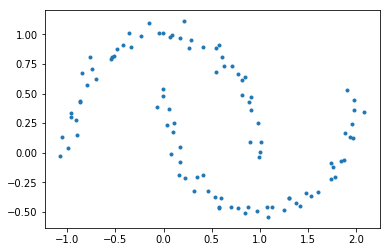

In [14]:
data = np.genfromtxt("data3.csv", delimiter=",")
plt.scatter(data[:,0],data[:,1], marker='.')

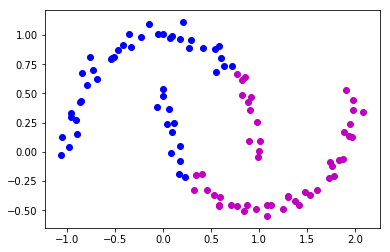

Total Cohesian: 40.769224533
Total Separation: 59.4527025267


In [15]:
mu, clusters = kMeansClustering(data, 2)
color=['b','m','y', 'c', 'g', 'black']
c = 0
for cluster in clusters:
    npCluster = np.array(cluster)
    plt.scatter(npCluster[:,0], npCluster[:,1], color=color[c])
    c += 1
plt.show()

print("Total Cohesian: " + str(calcCohesian(mu, clusters)))
print("Total Separation: " + str(calcSeparation(mu, clusters, calcOverallCentroid(data))))

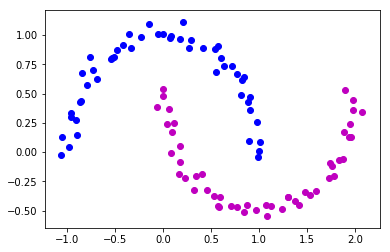

In [16]:
def DBSCAN(data, eps, minPts):
    #create a neigbhors dictionary key = idx in data, value = list of idxs in data
    #create a label list with idx = idx in data, value = label. 1 = Core, 0 = Border, -1 = Noise
    labels = [-1 for _ in range(len(data))]
    clusters = [-1 for _ in range(len(data))]
    #clusters = []
    c = -1
    # Label all points
    for idx in range(len(data)):
        neighbors = getNeighbors(idx, data, eps)
    
        if len(neighbors) >= minPts:
            labels[idx] = 1
            #cluster = clusters[idx] if clusters[idx] != -1 else c+1
            #c+=1
            for i in neighbors:
                if labels[i] != 1:
                    labels[i] = 0
                #clusters[i] = cluster
    
    #Loop through labeled Data set. For each Core Point,
    core_points = []
    border_points = []
    for i in range(len(labels)):
        if labels[i] == 1:
            core_points.append(i)
        elif labels[i] == 0:
            border_points.append(i)
   
    c = -1
    for d in range(len(labels)):
        if clusters[d] == -1 and labels[d] == 1:
            c += 1
            clusters[d] = c
            n = getNeighbors(d, data, eps)
            while len(n) > 0:
                neighbor = n.pop(0)
                if neighbor == d or clusters[neighbor] != -1:
                    continue
                clusters[neighbor] = c
                if labels[neighbor] == 1:
                    ns = getNeighbors(neighbor, data, eps)
                    for pt in ns:
                        n.append(pt)
    
    return clusters
     
def getNeighbors(ptIdx, data, eps):
    #returns list of neigbhors within EPS. List values are idxs of data
    neighbors = []
    for idx in range(len(data)):
        if np.linalg.norm(data[idx] - data[ptIdx]) < eps:
            neighbors.append(idx)
    return neighbors

cl = DBSCAN(data, 0.30, 3)
clusters = [[] for i in range(max(cl)+1)]
idx = 0
for i in cl:
    clusters[i].append(data[idx])
    idx+=1

color=['b','m','y', 'c', 'g', 'black']
c = 0
for cluster in clusters:
    npCluster = np.array(cluster)
    plt.scatter(npCluster[:,0], npCluster[:,1], color=color[c])
    c += 1
plt.show()

In [17]:
mu = []
for cluster in clusters:
    x = 0
    y = 0
    for p in cluster:
        x += p[0]
        y += p[1]
    mu.append((x/len(cluster), y/len(cluster)))
    
print("Total Cohesian: " + str(calcCohesian(mu, clusters)))
print("Total Separation: " + str(calcSeparation(mu, clusters, calcOverallCentroid(data))))

Total Cohesian: 61.2032625579
Total Separation: 39.0186645018


In [19]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import random as rand
import itertools as it

from pandas import DataFrame, Series

from scipy.cluster import hierarchy as hier
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

In [21]:
# Reading the Epileptic Seizure Data Set
dataset = pd.read_csv("seizure_edited.csv", header = 0)
print(dataset.shape)
labels = dataset['y']
data = dataset.drop('y', axis = 1)
dataset.head(10)

(11500, 179)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,55,28,18,16,16,19,25,40,52,66,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,-55,-9,52,111,135,129,103,72,37,0,...,-125,-99,-79,-62,-41,-26,11,67,128,4
7,1,-2,-8,-11,-12,-17,-15,-16,-18,-17,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,-278,-246,-215,-191,-177,-167,-157,-139,-118,-92,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,8,15,13,3,-6,-8,-5,4,25,41,...,49,31,11,-5,-17,-19,-15,-15,-11,4


In [22]:
def scatter(data, labels, numPoints = 100):
    mds = MDS(n_components=2)
    
    numEntries = data.shape[0]
    start = rand.randint(0, numEntries - numPoints)
    end = start + numPoints
    data = data.iloc[start:end, :]
    labels = labels.iloc[start:end]
    
    mds_data = mds.fit_transform(data.iloc[:, :-1])
    plt.scatter(mds_data[:, 0], mds_data[:, 1], c=labels, s=50)
    plt.show()

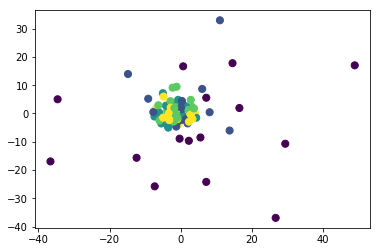

In [23]:
x_ax = []
for i in range(1, 179):
    x_ax.append(i)
scaler = StandardScaler()
x = dataset.drop('y', axis=1)
x = scaler.fit_transform(x)
y = dataset['y']

pca = PCA(n_components=39)
X_new = DataFrame(pca.fit_transform(x))
scatter(X_new, labels)

In [24]:
aggloData = None
aggloLabels = None

kfold = StratifiedKFold(n_splits = 100, shuffle = True)
for throwAway_index, subsample_index in kfold.split(data, labels):
    aggloData = data.iloc[subsample_index]
    aggloLabels = labels.iloc[subsample_index]
    
    break
print(aggloData.shape)

(115, 178)


In [25]:
linkageMethods = ["single", "complete", "average", "centroid", "ward"]
for method in linkageMethods:
    h = linkage(aggloData, method)
    c, coph_dists = cophenet(h, pdist(aggloData))
    print("Hierarchical Method: " + str(method))
    print(c)

Hierarchical Method: single
0.99082934427
Hierarchical Method: complete
0.963713456446
Hierarchical Method: average
0.99238714691
Hierarchical Method: centroid
0.99272287466
Hierarchical Method: ward
0.934345409135


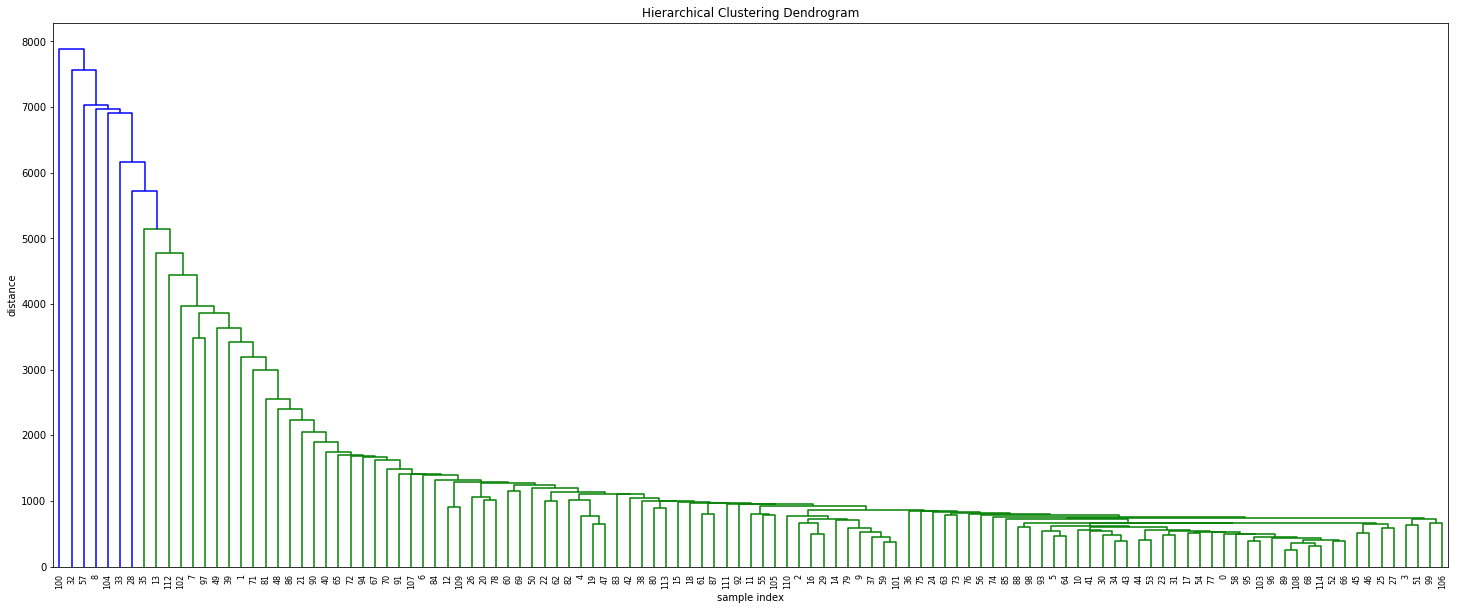

In [26]:
h = linkage(aggloData, "average")

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    h,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [27]:
maxD = -1000
maxi = -1
for i in range(len(h) - 1):
    dist = h[i+1, 2] - h[i, 2]
    if dist > maxD:
        maxD = dist
        maxi = i
optimalCluster = len(h) - maxi
print("Optimal Number of Clusters: " + str(optimalCluster))

Optimal Number of Clusters: 6


In [28]:
kmns = KMeans(n_clusters=optimalCluster, random_state=1).fit(data)
labelsK = kmns.labels_
print(silhouette_score(data, labelsK))

kmns = KMeans(n_clusters=2, random_state=1).fit(data)
labelsK = kmns.labels_
print("K=2: " + str(silhouette_score(data, labelsK)))

labelsK = KMeans(n_clusters=5, random_state=1).fit(data).labels_
print("K=5: " + str(silhouette_score(data, labelsK)))

0.081960462116
K=2: 0.614401851892
K=5: 0.0800260905076


Accuracy: 0.2925217391304348


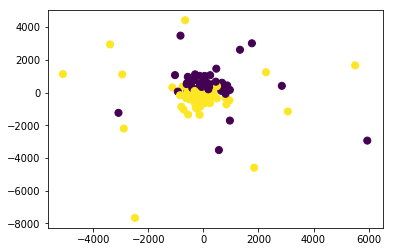

In [29]:
labelsK = KMeans(n_clusters=2).fit(data).labels_

correct =0 
for klabel, true_label in zip(labelsK, labels):
    if klabel == -1 and true_label == 1:
        correct += 1
    elif klabel == 0 and true_label in [2,3,4,5]:
        correct += 1
print("Accuracy: " + str((correct/len(labelsK))))
scatter(data, Series(labelsK))



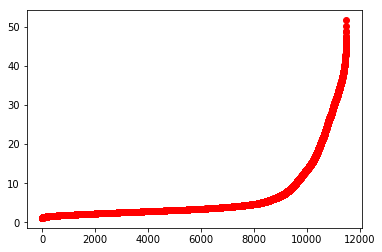

In [30]:
n = NearestNeighbors(n_neighbors=4)
n.fit(X_new)
dist, ind = n.kneighbors(X_new, n_neighbors=4)

kdist4 = [i[3] for i in dist]
x_ax = list(range(len(dist)))
kdist4.sort()
plt.plot(x_ax, kdist4, 'ro')
plt.show()


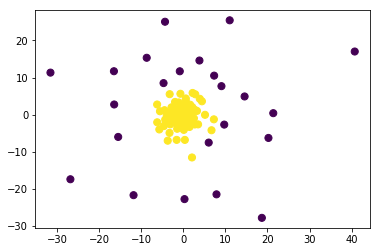

In [31]:
dbscan = DBSCAN(eps=7, min_samples=4)
dblabels = dbscan.fit_predict(X_new)
scatter(X_new, Series(dblabels))

In [32]:
correct = 0
true_labels = dataset['y']
for l in range(len(dblabels)):
    if dblabels[l] == 1 and true_labels[i] == 1:
        correct += 1
    elif dblabels[l] == 0 and true_labels[i] in [2,3,4,5]:
        correct += 1

print("Accuracy: " + str(correct/len(dblabels)))
    

Accuracy: 0.8005217391304348


### Anomaly Detection

In [36]:
from IPython.display import Image

# loading the datasets
filenames = ['Data/data1.csv', 'Data/data2.csv', 'Data/data3.csv', 'Data/data4.csv']
datasets = [np.loadtxt(fname, delimiter=', ') for fname in filenames]
for fname, data in zip(filenames, datasets):
    print (fname, data.shape)

Data/data1.csv (445, 2)
Data/data2.csv (314, 2)
Data/data3.csv (419, 2)
Data/data4.csv (441, 2)


Data/data1.csv


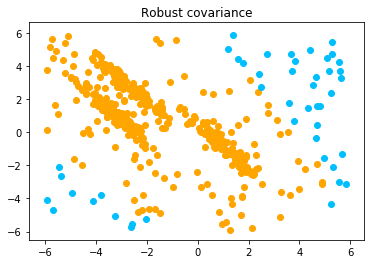

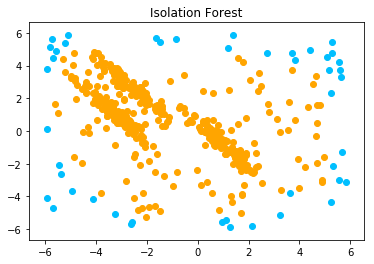

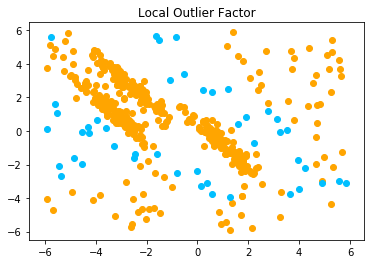

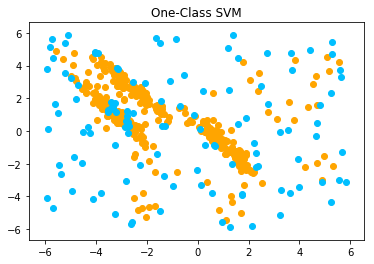

Data/data2.csv


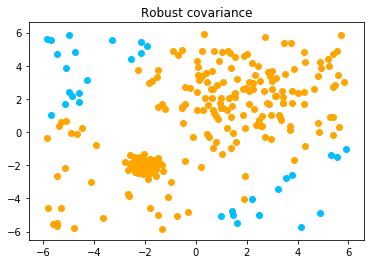

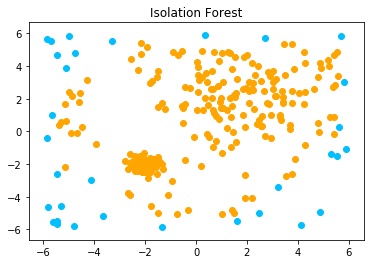

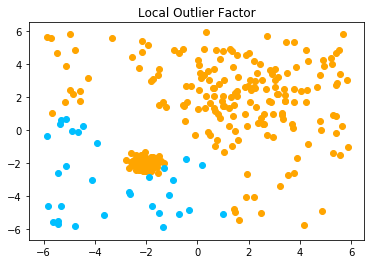

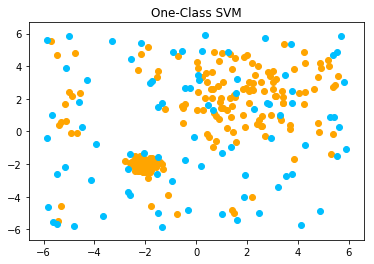

Data/data3.csv


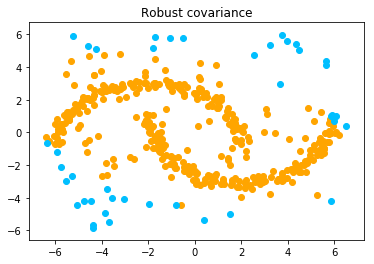

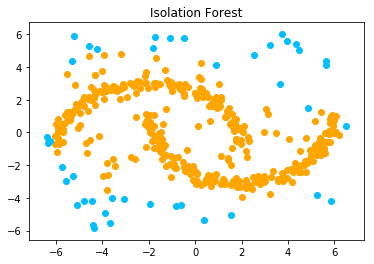

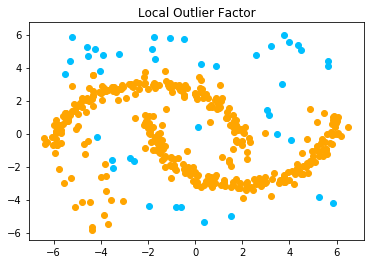

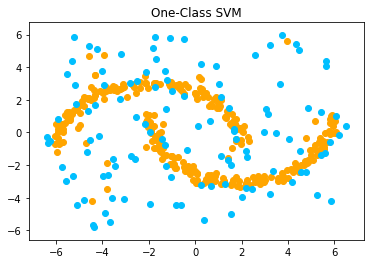

Data/data4.csv


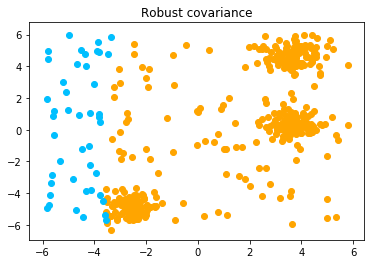

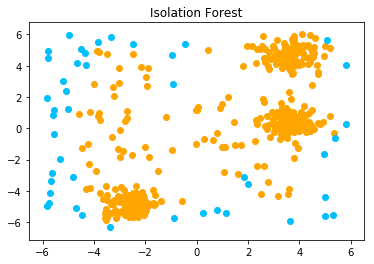

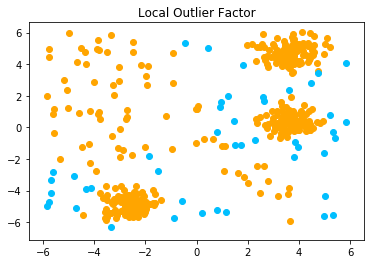

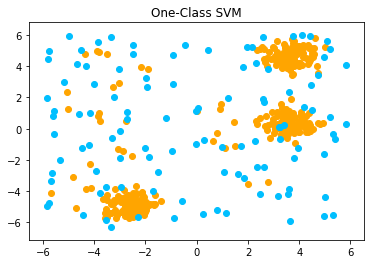

In [37]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

def graphOutliers(name, data, is_outliers):
    actual = []
    outliers = []
    for dataP, is_outlier in zip(data, is_outliers):
        if is_outlier == 1:
            actual.append(dataP)
        else:
            outliers.append(dataP)
    plt.scatter([x[0] for x in actual], [y[1] for y in actual], color='orange')
    plt.scatter([x[0] for x in outliers], [y[1] for y in outliers], color='deepskyblue')
    plt.title(name)
    plt.show()

for filename, data in zip(filenames,datasets):
    print(filename)
    # Elliptic Envelope
    env = EllipticEnvelope()
    env.fit(data)
    is_outliers = env.predict(data)
    graphOutliers("Robust covariance", data, is_outliers)
    
    forest = IsolationForest()
    forest.fit(data)
    is_outliers = forest.predict(data)
    graphOutliers("Isolation Forest", data, is_outliers)
    
    factor = LocalOutlierFactor()
    factor.fit(data)
    is_outliers = factor.fit_predict(data)
    graphOutliers("Local Outlier Factor", data, is_outliers)
    
    svm = OneClassSVM(kernel='rbf', nu=0.25)
    svm.fit(data)
    is_outliers = svm.predict(data)
    graphOutliers("One-Class SVM", data, is_outliers)
    
    
